# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст -
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.) -
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

In [149]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import linear_model

def cross_val(X, y, toPrint=True, scorVal=False):
    model = linear_model.LinearRegression()
    scores = cross_val_score(model, X, y, cv=4, scoring="r2")

    if (scorVal):
        for i, score in enumerate(scores):
            print(f"Разбиение {i+1}: R^2 = {score:.4f}")
    if(toPrint):
        print(f"Среднее :{scores.mean():.4f}")
    else :
        return scores.mean()


### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [150]:
import pandas as pd

df = pd.read_csv('data.csv')

df.rename(columns={'plans_universitypast_failures' : 'plans_university'}, inplace=True)
past_failures = []
for idx in df.index:
    past_failures.append(abs(df.loc[idx, 'plans_university']) % 10)
    df.loc[idx, 'plans_university'] = (0 if df.loc[idx, 'plans_university'] < 0 else 1)
df['past_failures'] = past_failures 

df.to_csv('changed_data.csv', index=False)


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [151]:
df = pd.read_csv('changed_data.csv')

for i in df.columns:
    df.fillna({i: df[i].median()}, inplace=True)

df.to_csv('changed_data.csv', index=False)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [152]:
df = pd.read_csv("changed_data.csv")
for col in df.columns[1:]:
    df[col] = (df[col])/(df[col].max())
df.to_csv('changed_data.csv', index=False)

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [153]:
firstAccuracy = cross_val(pd.read_csv("changed_data.csv"), pd.read_csv("scores.csv"), toPrint=False, scorVal=True)
print(f"Среднее :{firstAccuracy:.4f}")

Разбиение 1: R^2 = 0.2332
Разбиение 2: R^2 = 0.2536
Разбиение 3: R^2 = 0.1360
Разбиение 4: R^2 = 0.2433
Среднее :0.2165


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [154]:
data = pd.read_csv('changed_data.csv')

have_support = []


with open("school_support.txt", "r") as file:
    for i in file:
        have_support.append(int(i))

data["had_support"] = 0
for idx in have_support:
    data.at[idx, "had_support"] = 1

attendance = pd.read_csv("attendance.csv", sep=';')

for i in range(len(attendance)):
    cnt = 0
    for c in attendance.columns:
        cnt += (attendance.at[i, c] == '+')
    data.at[i, "attendances"] = cnt / 32

data.to_csv("changed_data.csv", index=False)


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

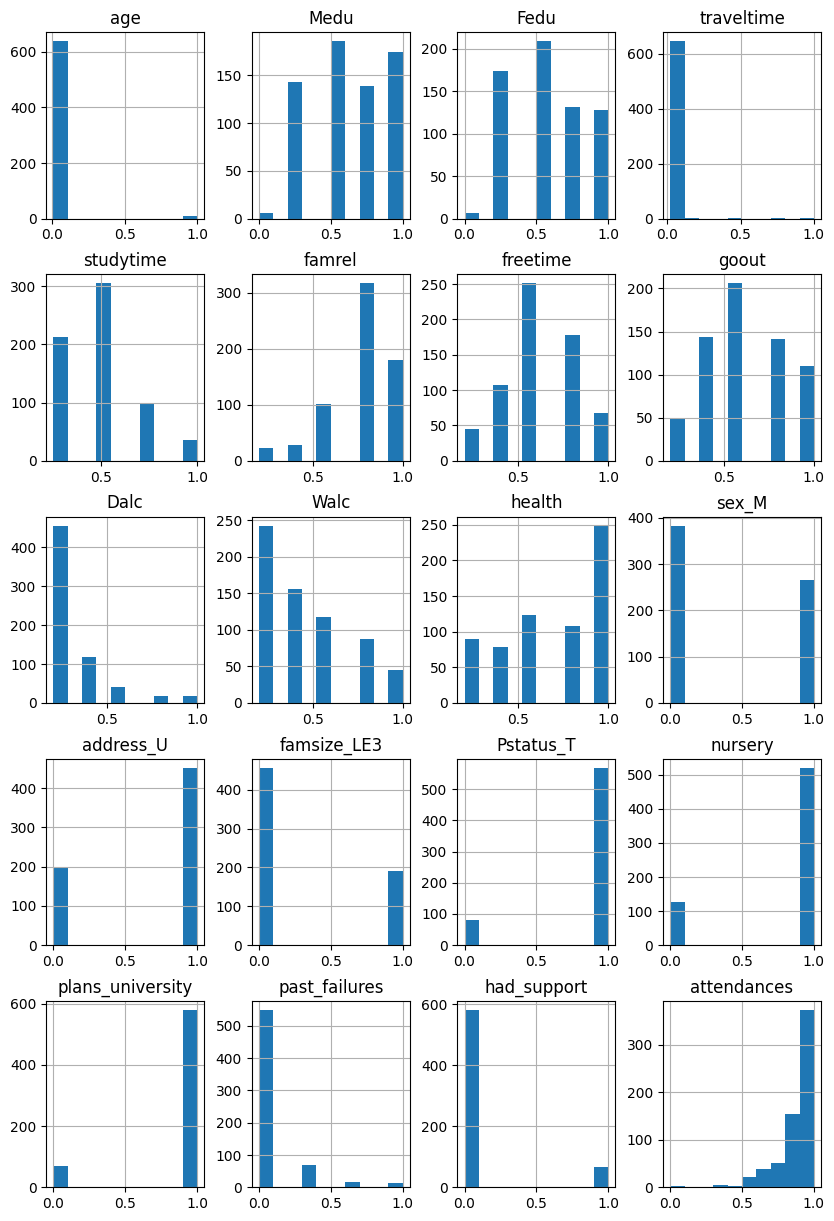

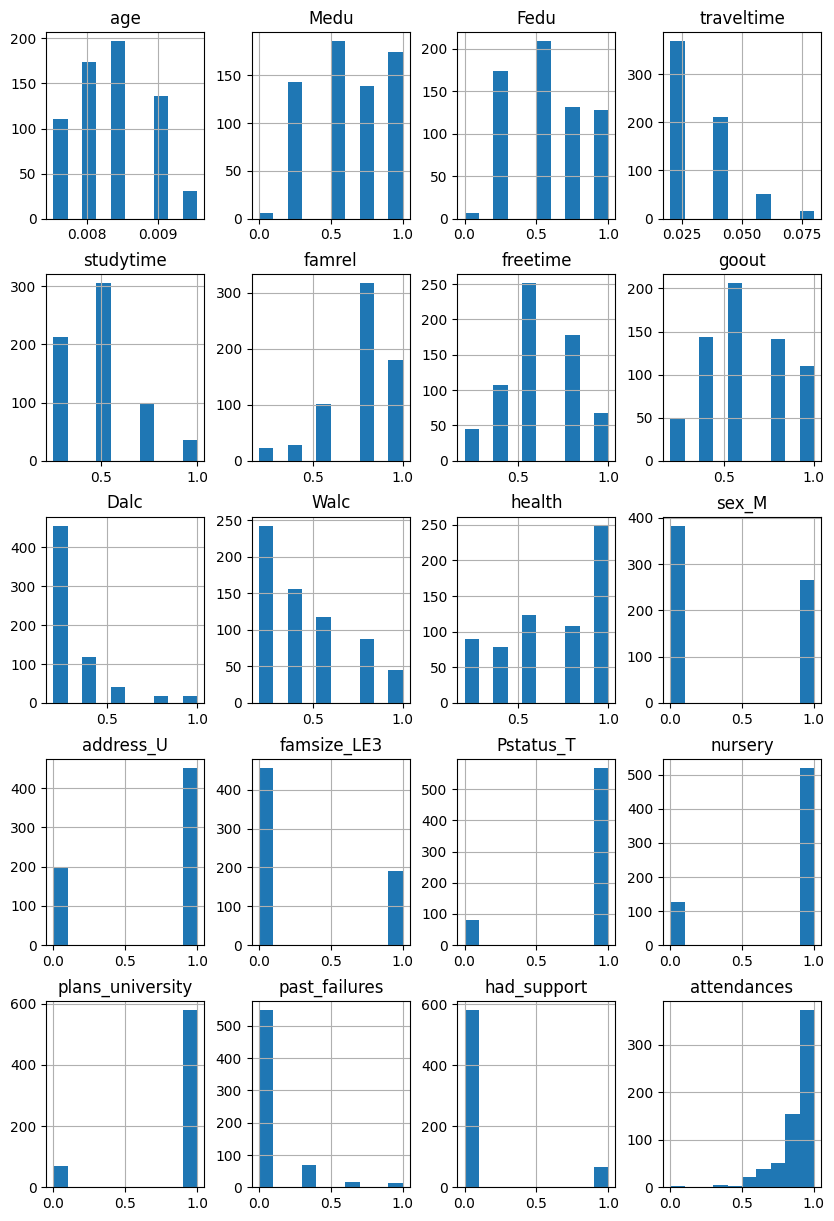

In [155]:
import matplotlib
import matplotlib.pyplot

df = pd.read_csv("changed_data.csv")
hist = df.hist(figsize=(10, 15), column=df.columns[1:])

df.loc[df['age'] > 0.01, 'age'] = df['age'].median()
df.loc[df['traveltime'] >= 0.2, 'traveltime'] = df['traveltime'].median()

hist = df.hist(figsize=(10, 15), column=df.columns[1:])
df.to_csv('changed_data.csv', index=False)

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

Удалено строк: 30
Среднее :0.3202


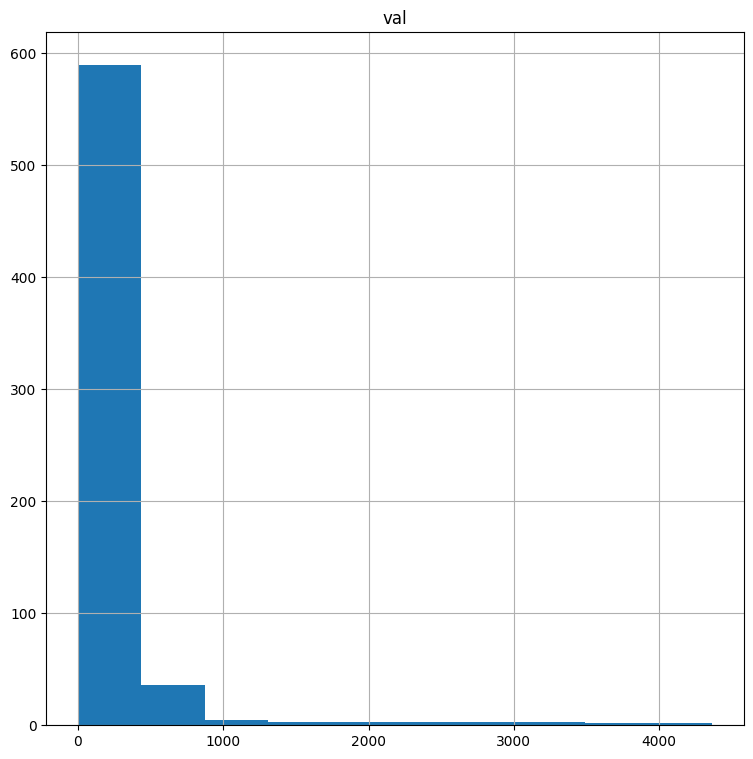

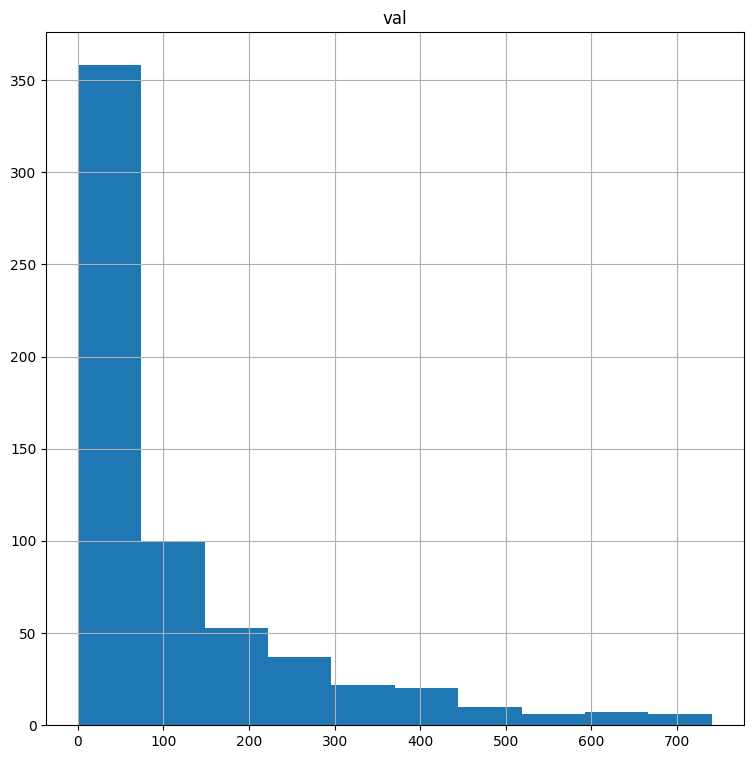

In [156]:
import sklearn
from sklearn import linear_model

df = pd.read_csv("changed_data.csv")
scores = pd.read_csv("scores.csv")
errors = pd.DataFrame()

regression = linear_model.LinearRegression().fit(df, scores)
prediction = regression.predict(df)
errors['val'] = (prediction - scores) ** 2
hist = errors.hist(figsize=(9, 9))
cnt = 0
for i in range(len(prediction)):
    if (errors.at[i, "val"] > 750):
        df = df.drop(i)
        scores = scores.drop(i)
        cnt += 1
print(f"Удалено строк: {cnt}")
df.to_csv("changed_data.csv", index=False)

scores.to_csv("changed_scores.csv", index=False)
prediction = regression.predict(df)
errors['val'] = (prediction - scores) ** 2
hist = errors.hist(figsize=(9, 9))

cross_val(pd.read_csv("changed_data.csv"), pd.read_csv("changed_scores.csv"))


### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [157]:
print(f"Результат улучшился на {100*(cross_val(pd.read_csv("changed_data.csv"), pd.read_csv("changed_scores.csv"), toPrint=False) - firstAccuracy):.2f}%")

Результат улучшился на 10.37%
